In [58]:
# 2a) медицина, реальные, источник : https://www.kaggle.com/datasets/mathchi/diabetes-data-set
# 2b) атрибуты:
#      Pregnancies: Количество раз беременности (integer)
#      Glucose: Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе (integer)
#      BloodPressure: Диастолическое артериальное давление "мм рт. ст." (integer)
#      SkinThickness: Толщина кожной складки трицепса "мм" (integer)
#      Insulin: 2-часовой сывороточный инсулин (integer)
#      BMI: Индекс массы тела (float)
#      DiabetesPedigreeFunction: Функция родословной диабета (float)
#      Age: Возраст (integer)
#      Outcome: Результат "0 или 1" (integer)
#  2c) Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек. 
#      Цель состоит в том, чтобы на основе диагностических измерений предсказать, есть ли у пациента диабет.
#      На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. 
#      В частности, все пациенты здесь — женщины не моложе 21 года, родом из Pima Indian.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [59]:
# С помощью встроенных функций определяю среднее значение и стандартное отклонение каждого столбца
for column in df:
    print("Среднее значение ", column, " = ", df[column].mean())
for column in df:    
    print("Стандартное отклонение ", column, " = ", df[column].std())

Среднее значение  Pregnancies  =  3.8450520833333335
Среднее значение  Glucose  =  120.89453125
Среднее значение  BloodPressure  =  69.10546875
Среднее значение  SkinThickness  =  20.536458333333332
Среднее значение  Insulin  =  79.79947916666667
Среднее значение  BMI  =  31.992578124999998
Среднее значение  DiabetesPedigreeFunction  =  0.47187630208333325
Среднее значение  Age  =  33.240885416666664
Среднее значение  Outcome  =  0.3489583333333333
Стандартное отклонение  Pregnancies  =  3.3695780626988694
Стандартное отклонение  Glucose  =  31.97261819513622
Стандартное отклонение  BloodPressure  =  19.355807170644777
Стандартное отклонение  SkinThickness  =  15.952217567727637
Стандартное отклонение  Insulin  =  115.24400235133817
Стандартное отклонение  BMI  =  7.884160320375446
Стандартное отклонение  DiabetesPedigreeFunction  =  0.3313285950127749
Стандартное отклонение  Age  =  11.760231540678685
Стандартное отклонение  Outcome  =  0.47695137724279896


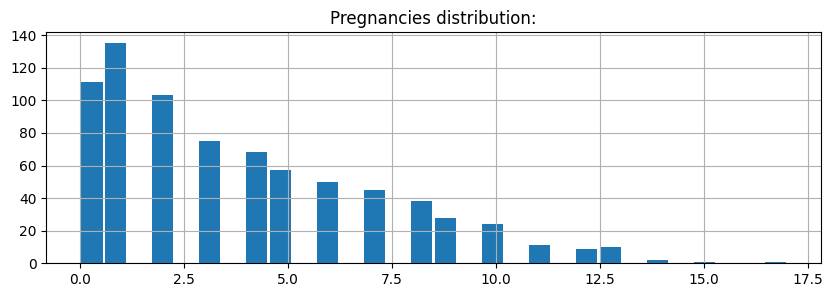

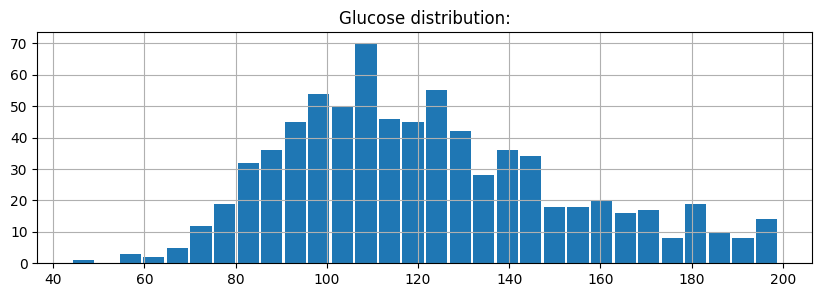

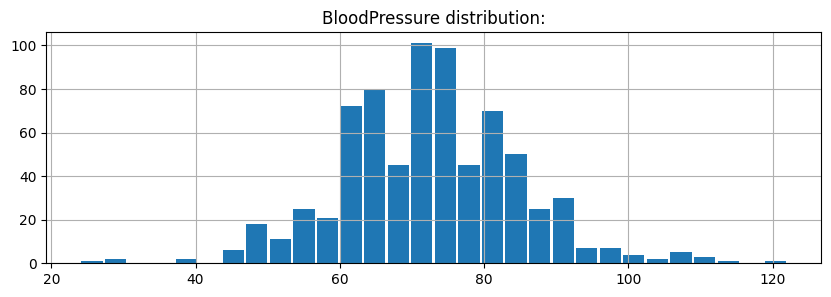

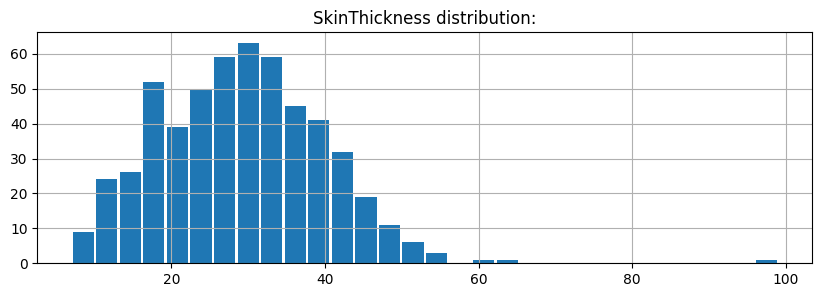

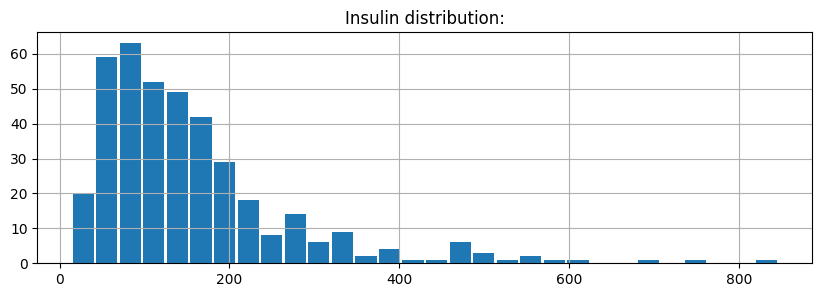

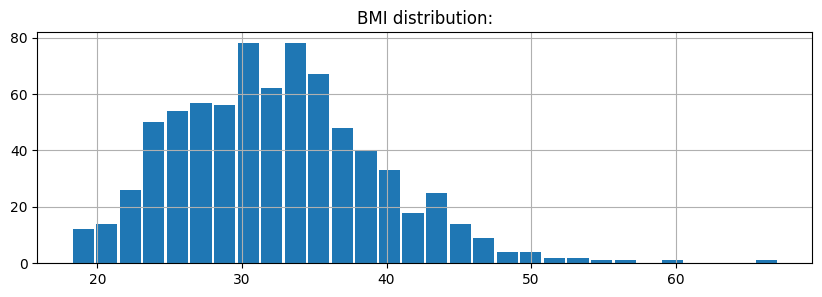

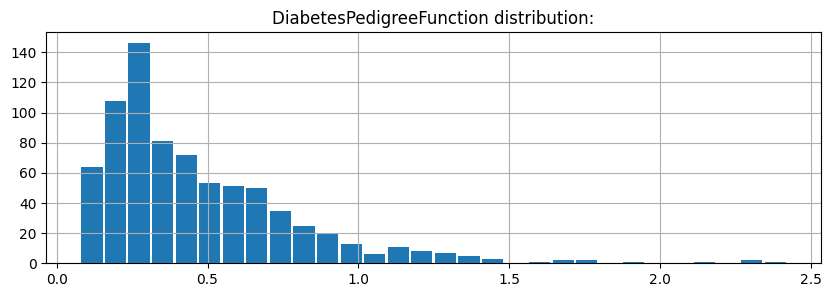

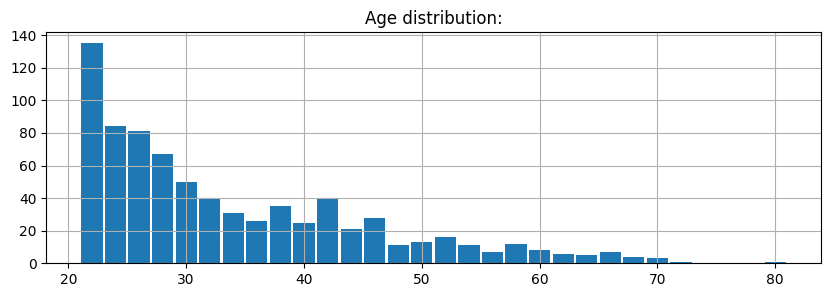

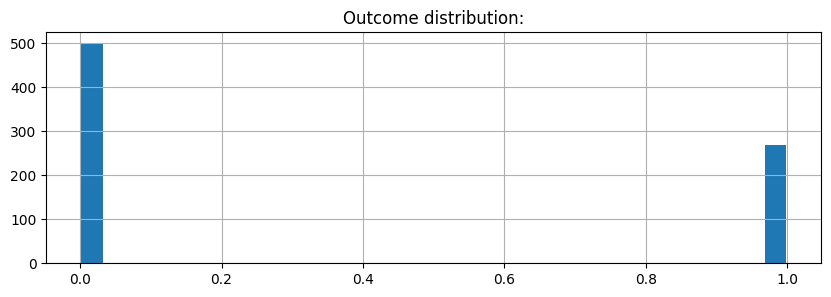

In [75]:
# С помощью цикла вывожу гистограммы распределений для каждого столбца
for col in df:
    plt.figure(figsize = (10,3))
    plt.hist(df[col], bins = 30, rwidth= 0.9)
    plt.grid(True)
    plt.title(col + ' distribution:')        

C:\Users\Артём\AppData\Local\Temp\ipykernel_16124\3878410378.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Pregnancies'),
 Text(1, 0, 'Glucose'),
 Text(2, 0, 'BloodPressure'),
 Text(3, 0, 'SkinThickness'),
 Text(4, 0, 'Insulin'),
 Text(5, 0, 'BMI'),
 Text(6, 0, 'DiabetesPedigreeFunction'),
 Text(7, 0, 'Age'),
 Text(8, 0, 'Outcome')]

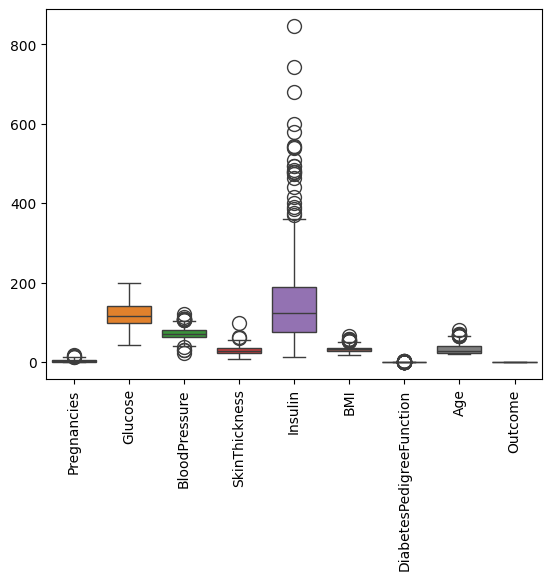

In [108]:
ax = sns.boxplot(data=df, fliersize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Выбросы есть у:
#                  BloodPresure
#                  SkinThickness
#                  Insulin
#                  BMI   

In [95]:
df["BMI"] = df["BMI"].replace(0.0, np.nan)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)
df["Glucose"] = df["Glucose"].replace(0, np.nan)
df["Insulin"] = df["Insulin"].replace(0, np.nan)

In [72]:
print(df.info())
# пропущенные значения:
#    Glucose - 5
#    BloodPressure - 35
#    SkinThickness - 227
#    Insulin - 374
#    BMI - 11  
# возможные решения проблемы с пропушенные значениями:
# 1) делать прогноз с отсутствующими значениями
# 2) удалить строки с отсутствующими значениями (не рационально, теряется половина строк)
# 3) заменить отсутствующие значения средними/медианными/прогнозируемыми величинами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


In [73]:
cols = []
for col in df:
    cols.append(col)
df[cols].corr()

# корреляция, значение которой близко к 0 означает отсутствие зависимости значений
# положительная корреляция - при росте одного значения растет и другое
# отрицательная корреляция - при росте одного значения уменьшается другое
# высокая корреляция: pregnancies-age; glucose-outcome; skinthickness-insulin; skinthickness-bmi
# не имеют корреляции: pregnancies-bmi; pregnancies-diabetespedigreefunction; 
#                    bloodpressure-insulin; diabetespedigreefunction-bloodpressure, то есть значения близкие к 0
#                    
#

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

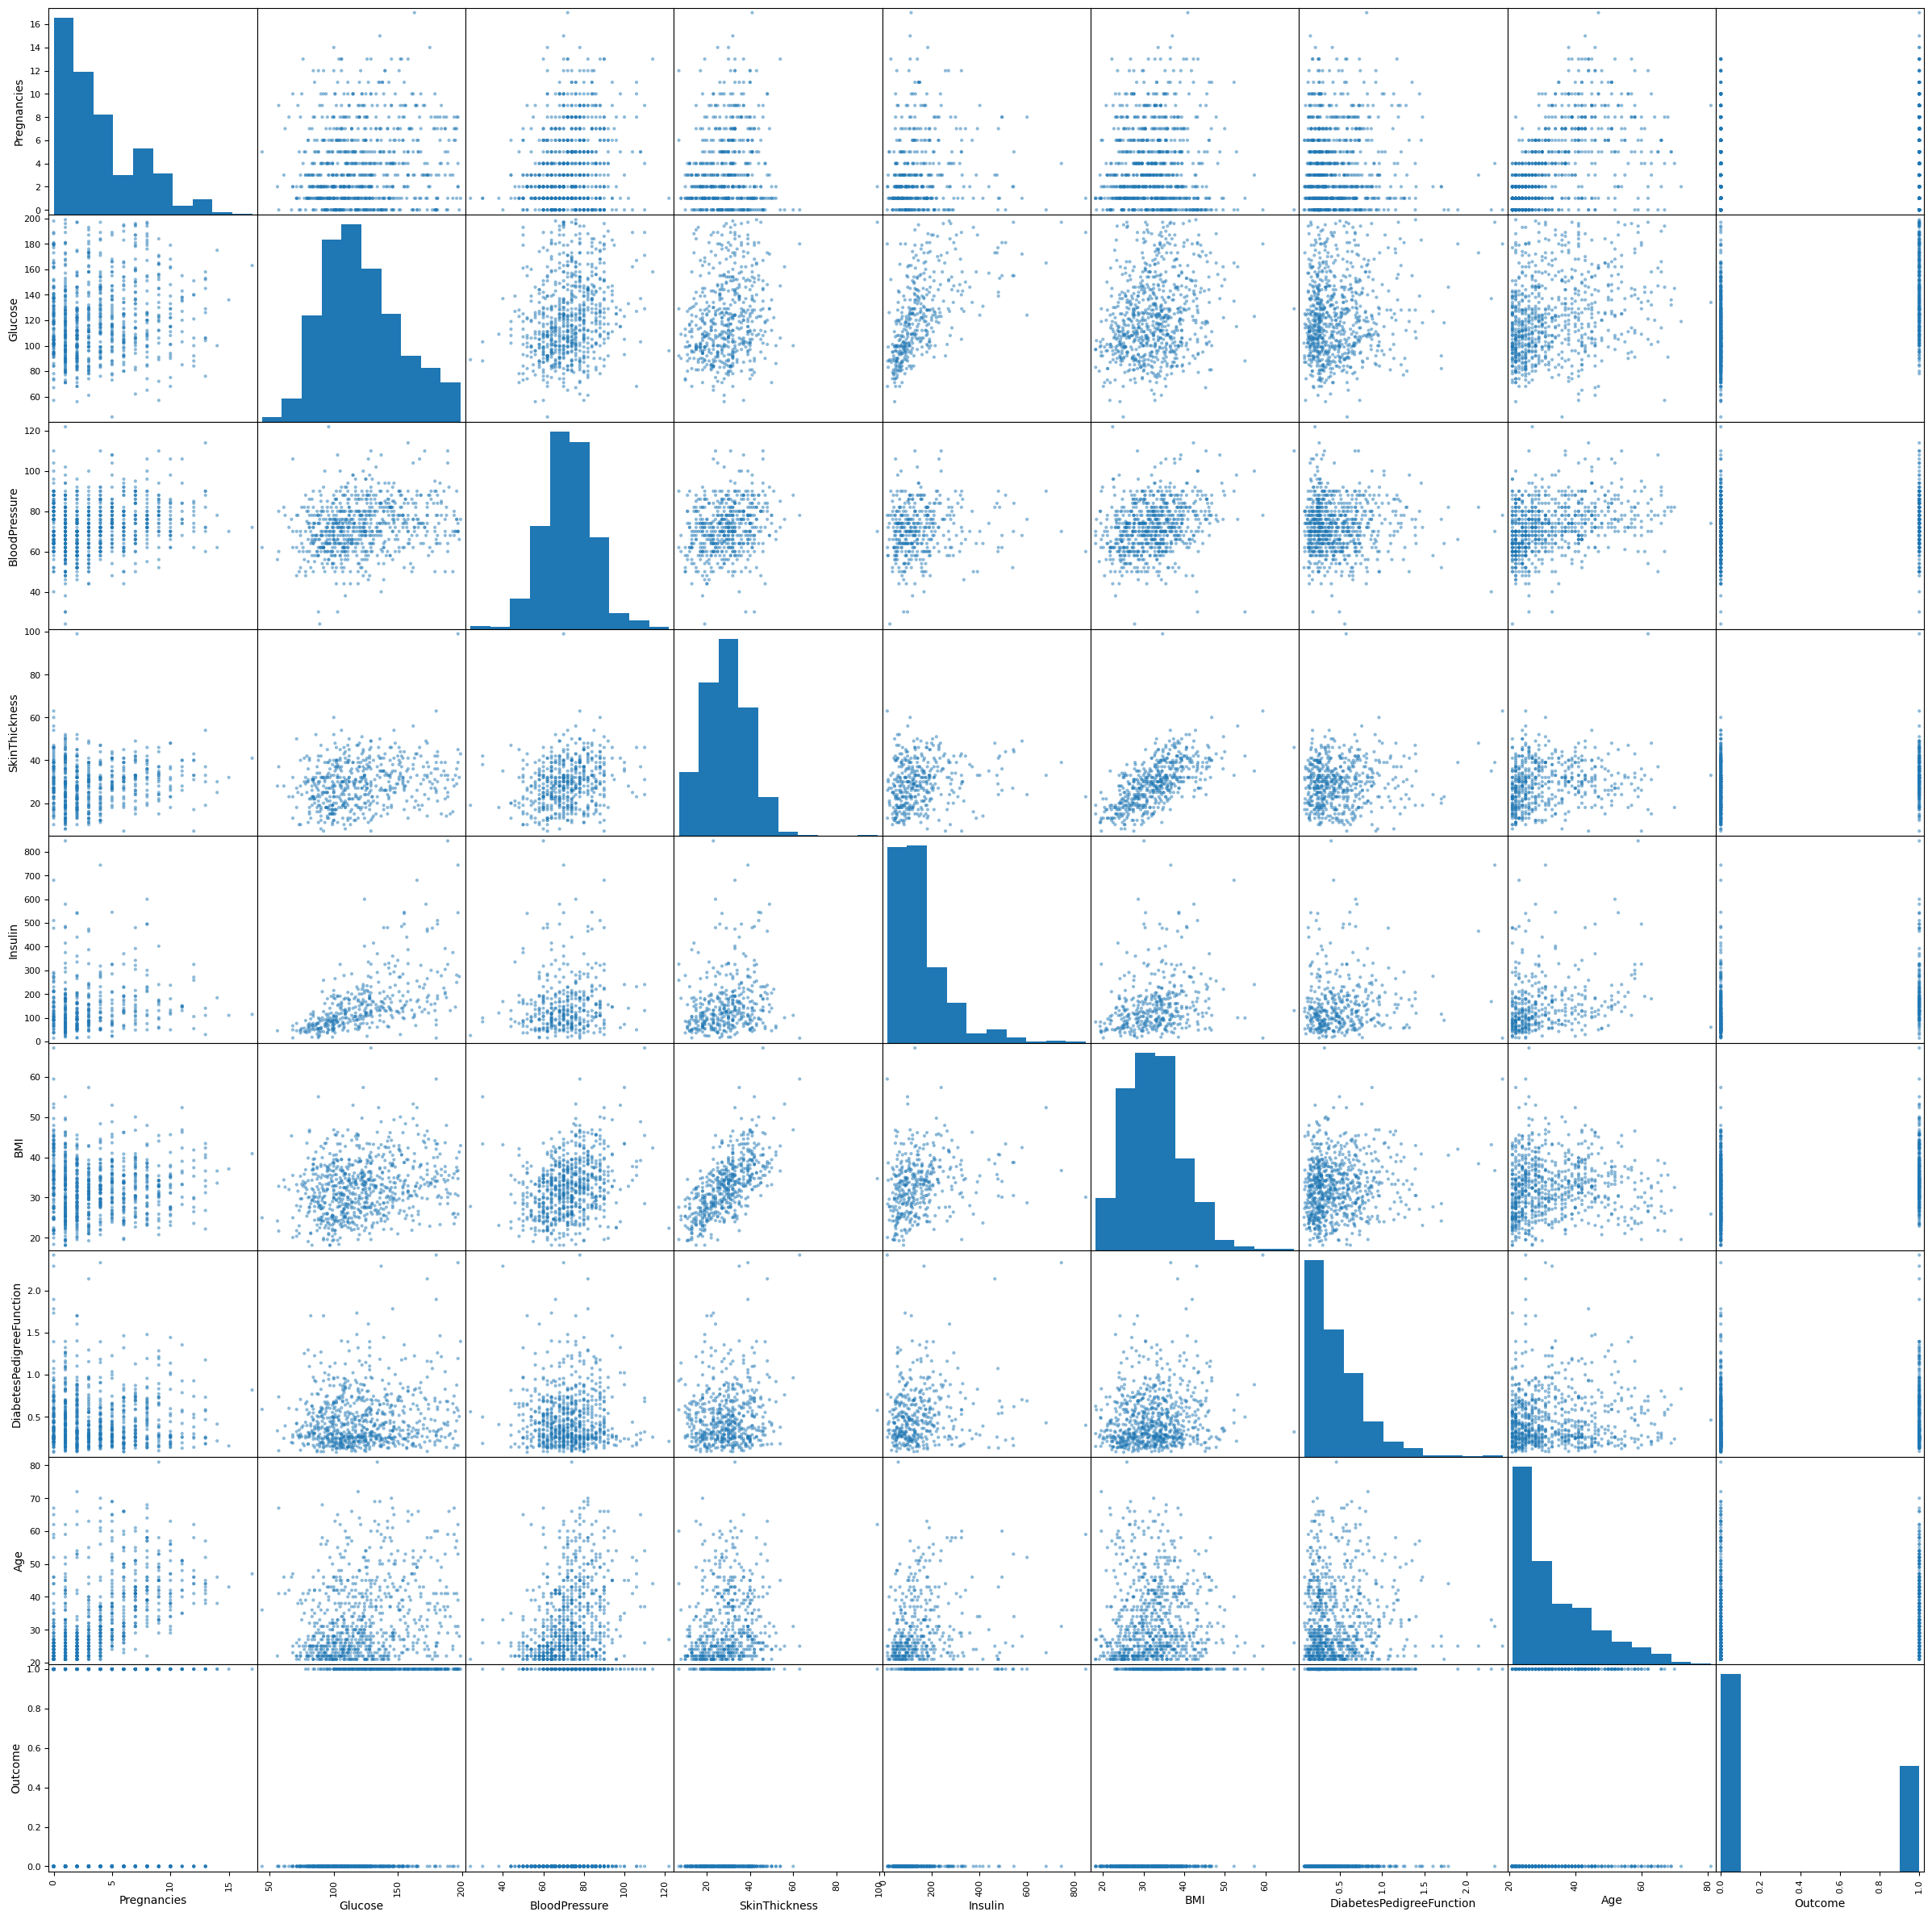

In [74]:
pd.plotting.scatter_matrix(df, figsize = (30,30))

In [ ]:
# Результат
#
# Исходя из имеющих данных можно сделать вывод, что на наличие диабета 
# максимальное влияние оказывает повышенные уровень глюкозы в крови и инсулина, а также
# повышенный индекс массы тела.
# Меньше всего влияет на наличие диабета повышенный сердечный пульс.
# Средний возраст опрашиваемых составил 33 года.
# Средний сердечный пульс равен 69-ти.
# По гистограмме количества беременностей можно сделать вывод, что чем больше возраст - тем больше беременностей.
# Так же можно заметить, что большое количество опрашиваемых не прошли тест на инсулин, что значительно осложняет проведение исследования.
#